
#Problem Statement

Car Analysis
Objective: Develop a machine learning model to predict the age of a car based on various features provided in the dataset.
Key Features to Analyze:
Make and Model: Manufacturer and model of the car.
Year of Manufacture: The year the car was made.
Engine Size (cc): The engine capacity of the car.
Horsepower (hp): The power output of the car's engine.
Fuel Type: The type of fuel used (e.g., petrol, diesel, electric).
Mileage (km): The distance traveled by the car.
Price ($): The market price of the car.
Location: Geographic location where the car is registered.
Transmission Type: Type of transmission (e.g., automatic, manual).
Color: The color of the car.
Goal:
Use the features in the dataset to accurately predict the price of the car
.

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




1. Project Overview
Project Titlecar pricege Prediction using Machine Learning

Objective: Develop a machine learning model to predict the age of a car based on features available in the dataset.

Dataset: car_data.csv

Target pr i ceiabe:pricprice(the age of the car)

Features: All oter column
s in t
he dataset

In [11]:

df = pd.read_csv('car_data.csv')
df


,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42084,42084,Isuzu,Bighorn,450000,Yakutsk,diesel,automatic,4WD,183212,JP,3.1,125,30
42085,42085,Toyota,Corolla Axio,650000,Yakutsk,gasoline,CVT,FWD,110000,JP,1.5,110,13
42086,42086,Daihatsu,Be-Go,1350000,Yakutsk,gasoline,automatic,4WD,153000,JP,1.5,109,13
42087,42087,Mazda,Tribute,550000,Yakutsk,gasoline,automatic,4WD,190000,JP,2.0,129,23


# provides a summary of the dataset including data types and non-null count

In [14]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42089 entries, 0 to 42088
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           42089 non-null  int64  
 1   car_brand            42089 non-null  object 
 2   car_model            42089 non-null  object 
 3   car_price            42089 non-null  int64  
 4   car_city             42089 non-null  object 
 5   car_fuel             42089 non-null  object 
 6   car_transmission     42089 non-null  object 
 7   car_drive            42089 non-null  object 
 8   car_mileage          42089 non-null  int64  
 9   car_country          42089 non-null  object 
 10  car_engine_capacity  42089 non-null  float64
 11  car_engine_hp        42089 non-null  int64  
 12  car_age              42089 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 4.2+ MB


show the first 20 rows

In [17]:

df.head(20)


,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2
5,5,Mercedes-Benz,E-Class,3779999,Astrakhan,gasoline,automatic,4WD,125000,DE,2.0,184,6
6,6,Toyota,RAV4,2539000,Astrakhan,gasoline,CVT,FWD,68023,JP,2.0,146,9
7,7,Ford,Focus,555000,Astrakhan,gasoline,manual,FWD,261000,USA,1.8,125,18
8,8,Honda,Civic,455000,Astrakhan,gasoline,automatic,FWD,250000,JP,1.5,105,22
9,9,Kia,Rio X (X-Line),1950000,Astrakhan,gasoline,automatic,FWD,40000,KR,1.6,123,5


#provides descriptive statistics of the dataset.

In [20]:

df.describe()


,Unnamed: 0,car_price,car_mileage,car_engine_capacity,car_engine_hp,car_age
count,42089.000000,4.208900e+04,42089.000000,42089.000000,42089.000000,42089.000000
mean,21044.000000,1.712717e+06,144846.070517,1.977084,147.329373,11.697261
std,12150.192077,1.976693e+06,92460.616254,0.782458,69.438003,7.379045
min,0.000000,7.000000e+03,1.000000,0.600000,30.000000,0.000000
25%,10522.000000,7.300000e+05,76500.000000,1.600000,105.000000,6.000000
50%,21044.000000,1.250000e+06,134500.000000,1.700000,130.000000,11.000000
75%,31566.000000,2.024900e+06,200000.000000,2.000000,170.000000,16.000000
max,42088.000000,7.000000e+07,996658.000000,8.000000,1197.000000,84.000000


Missing Values: Identify and handle missing values.

In [23]:

df.isnull().sum()


Unnamed: 0             0
car_brand              0
car_model              0
car_price              0
car_city               0
car_fuel               0
car_transmission       0
car_drive              0
car_mileage            0
car_country            0
car_engine_capacity    0
car_engine_hp          0
car_age                0
dtype: int64

#check the duplicate values

In [26]:

df.duplicated().sum()


0


#Encoding Categorical Features:


Categorical variables are converted to numerical values using LabelEco
der

In [29]:

le = LabelEncoder()

df['car_brand']       = le.fit_transform(df['car_brand'])
df['car_model']       = le.fit_transform(df['car_model'])
df['car_city']        = le.fit_transform(df['car_city'])
df['car_fuel']        = le.fit_transform(df['car_fuel'])
df['car_transmission']= le.fit_transform(df['car_transmission'])
df['car_drive']       = le.fit_transform(df['car_drive'])
df['car_country']     = le.fit_transform(df['car_country'])


In [31]:

df.drop(columns=['Unnamed: 0'],inplace=True)


In [33]:

df


,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,29,498,550000,0,1,2,1,300000,14,1.8,125,14
1,71,524,1820000,0,1,3,1,88000,2,1.6,156,10
2,39,472,2600000,0,1,3,0,19000,0,1.5,150,2
3,102,280,4200000,0,1,1,1,30000,7,3.5,249,2
4,76,244,2125000,0,1,0,1,18824,0,1.5,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
42084,48,204,450000,22,0,1,0,183212,7,3.1,125,30
42085,102,345,650000,22,1,0,1,110000,7,1.5,110,13
42086,20,192,1350000,22,1,1,0,153000,7,1.5,109,13
42087,70,1212,550000,22,1,1,0,190000,7,2.0,129,23



Data Visualization:

Create histograms for all numerical columns to understand the distributia.

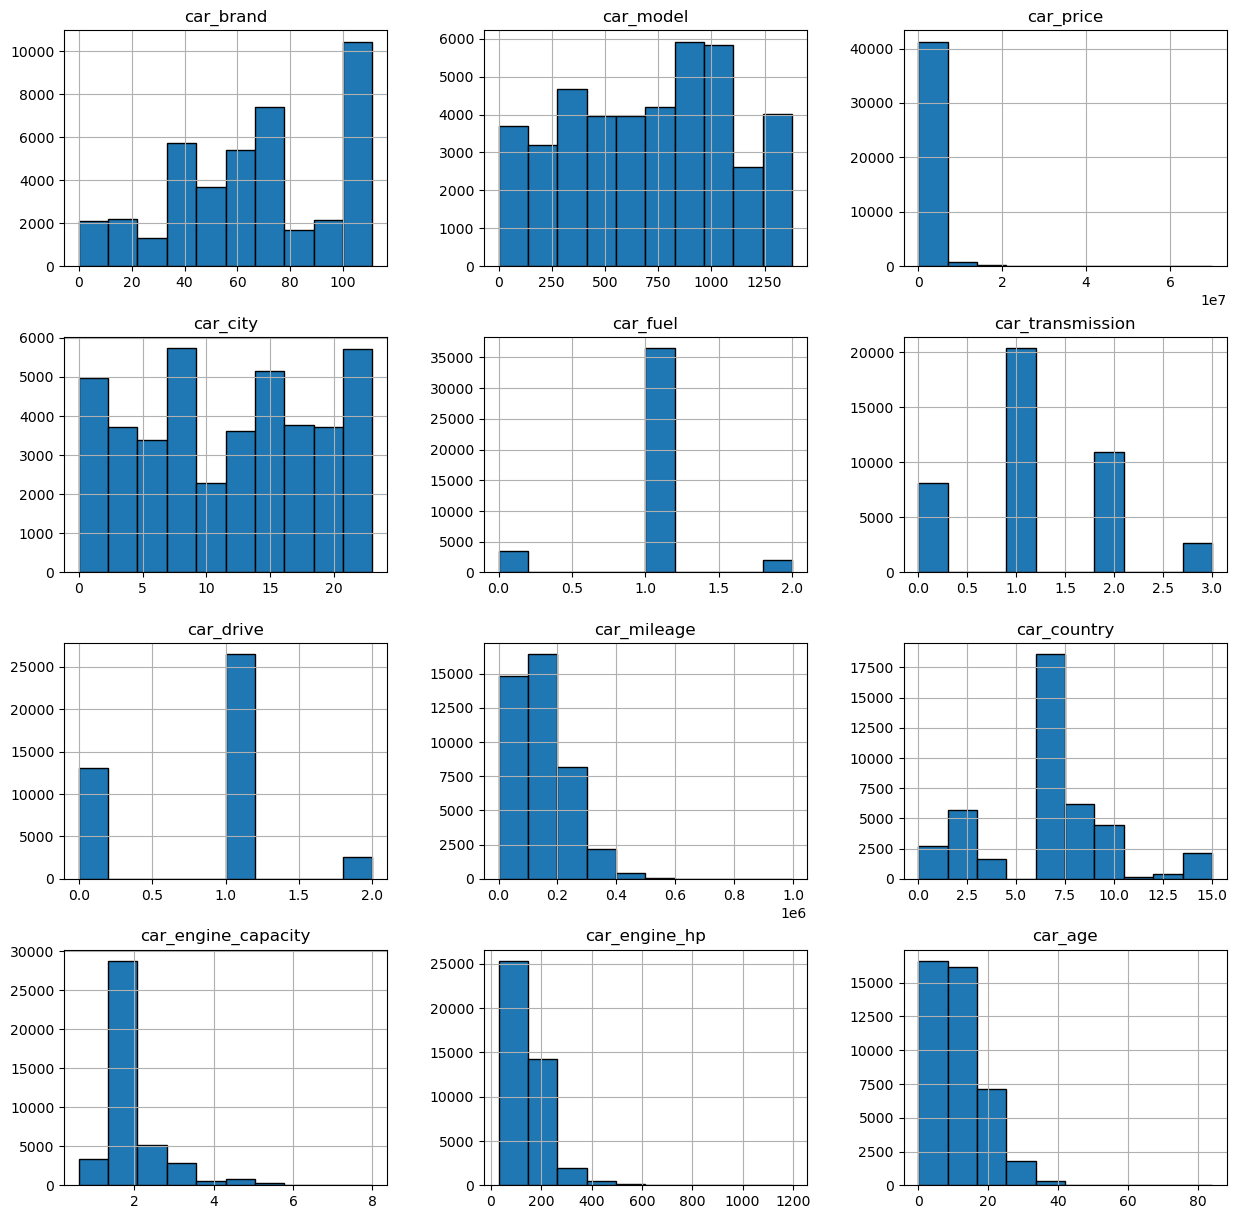

In [36]:

df.hist(edgecolor = 'k', figsize=(15,15))
plt.show()


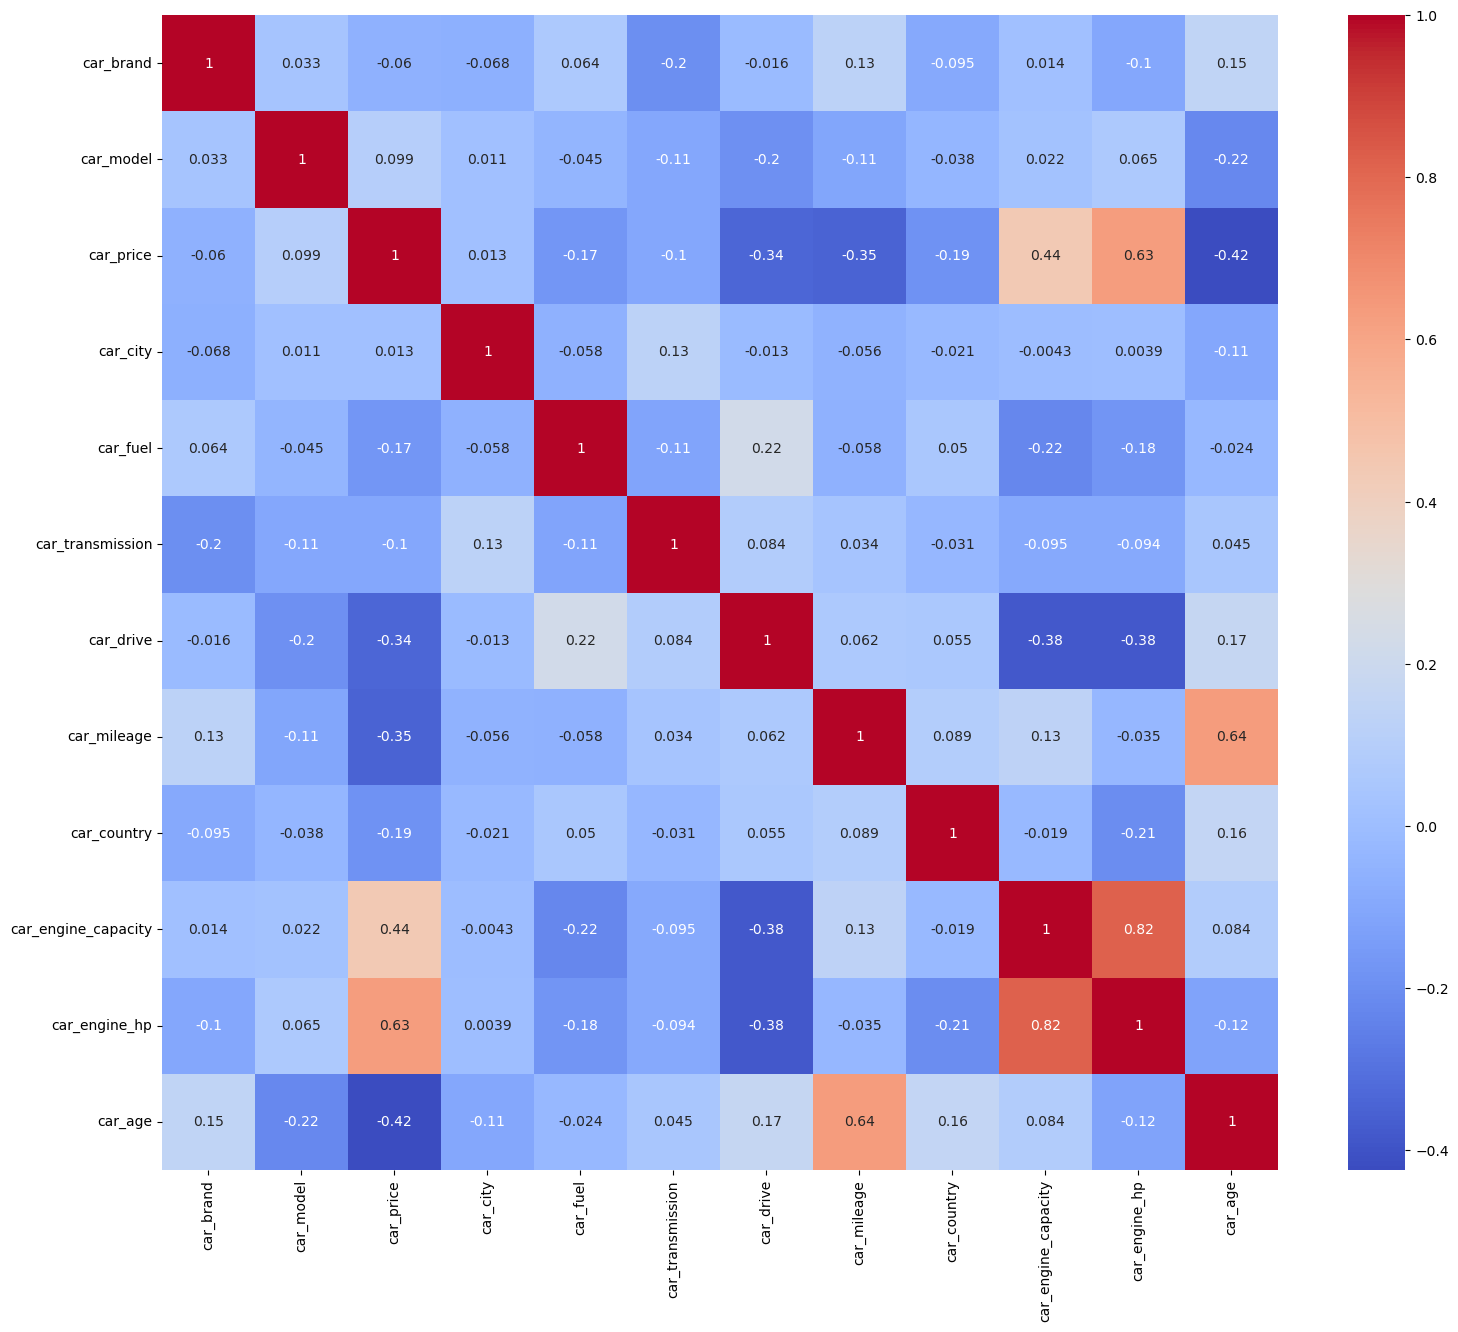

In [37]:

x = df.corr()
plt.figure(figsize =(18, 15))
sns.heatmap(x, annot = True, cmap = 'coolwarm')
plt.show()


#Dropping Unnecessary Columns:
Unnecessary columns are removed from the dataset to simplify the analysis

In [40]:

df.drop(columns = ['car_model'],           inplace = True)
df.drop(columns = ['car_engine_capacity'], inplace = True)
df.drop(columns = ['car_city'],            inplace = True)
df.drop(columns = ['car_fuel'],            inplace = True)
df.drop(columns = ['car_transmission'],    inplace = True)
df.drop(columns = ['car_brand'],           inplace = True)


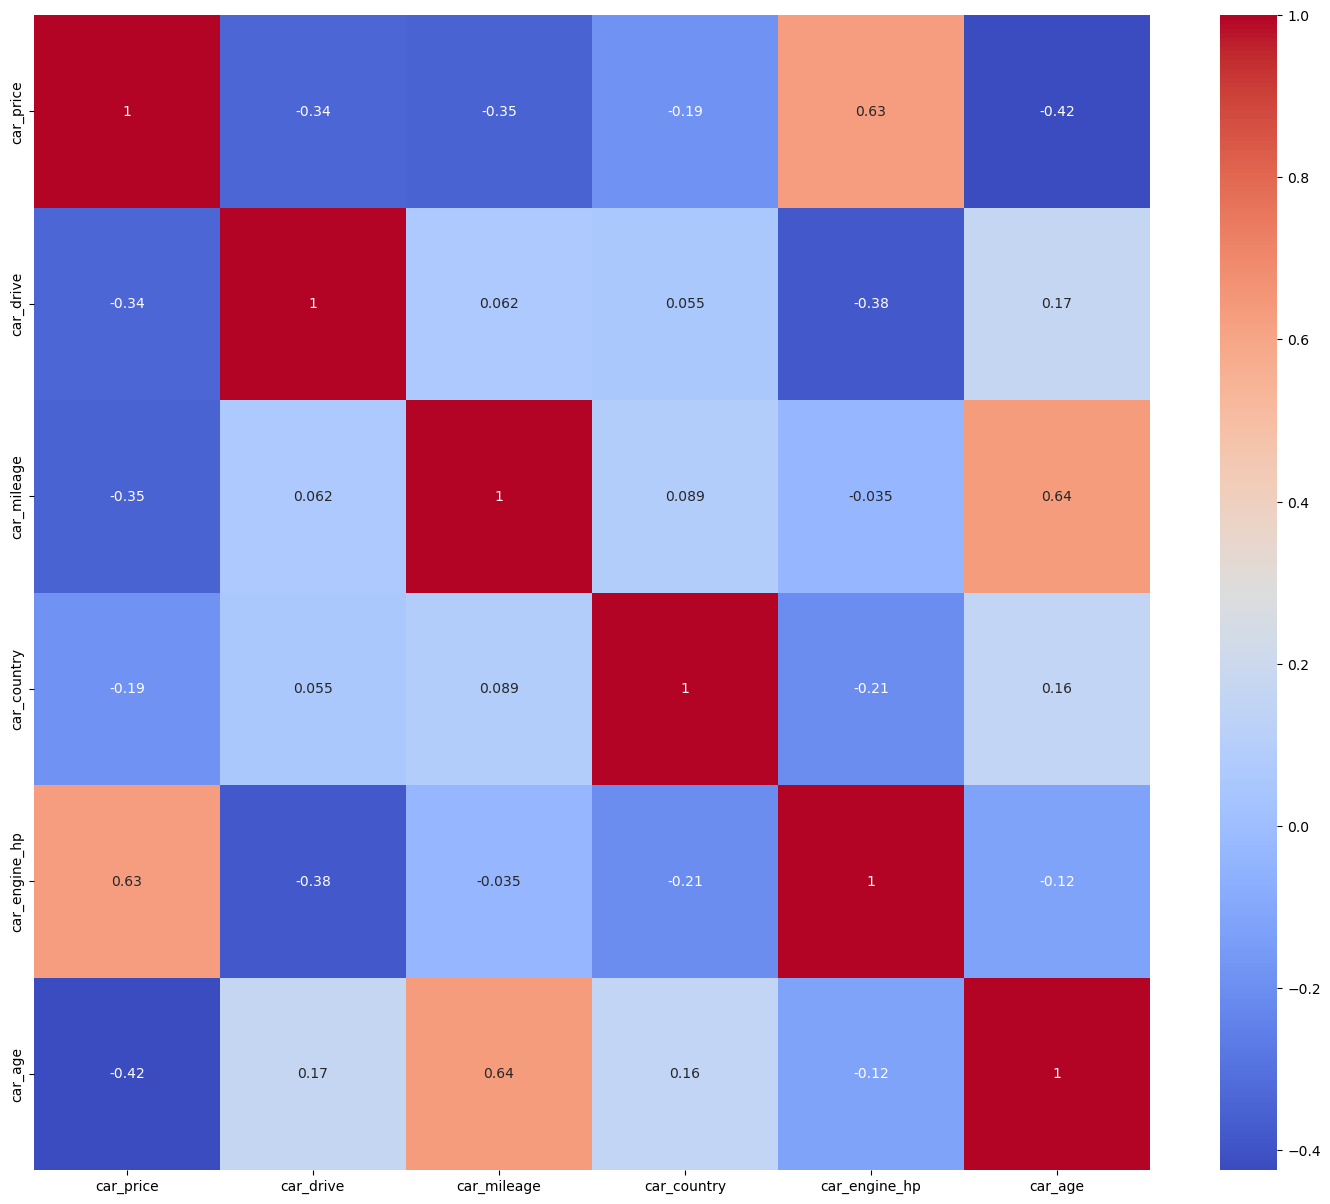

In [43]:

x = df.corr()
plt.figure(figsize =(18, 15))
sns.heatmap(x, annot = True, cmap = 'coolwarm')
plt.show()


In [45]:

cor=df.corr()['car_price']#finding correlatiom
cor.sort_values(ascending=False)


car_price        1.000000
car_engine_hp    0.627471
car_country     -0.187577
car_drive       -0.336487
car_mileage     -0.349092
car_age         -0.424384
Name: car_price, dtype: float64

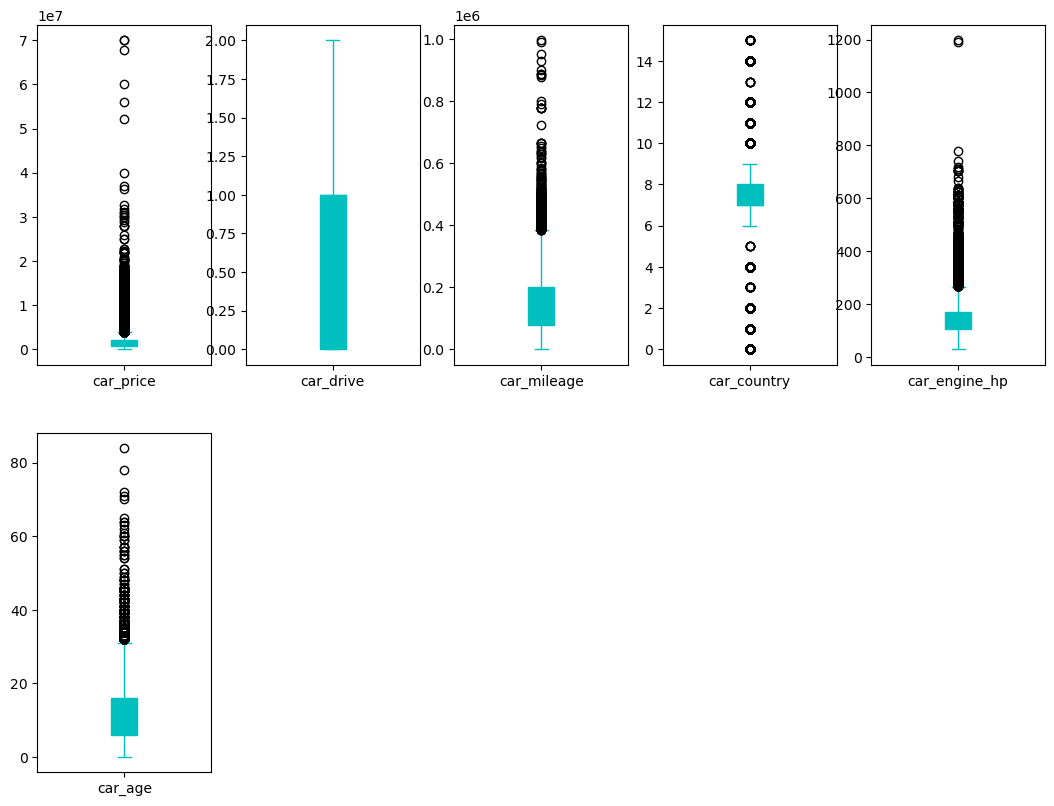

In [47]:

df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='c',patch_artist=True)
plt.show()


#Handling Outliers:

The function remove_outliers_iqr removes outliers using the Interquartile Range (IQR) method.

In [50]:

Q1=np.quantile(df, 0.25)
Q2=np.quantile(df, 0.50)
Q3=np.quantile(df, 0.75)
Q1, Q2, Q3


(6.0, 34.0, 130000.0)

In [52]:

IQR = Q3 - Q1
IQR


129994.0


1. Objective
Develop a function to remove outliers from a DataFrame using the Interquartile Range (IQR) method and apply it to all columns of the DataFrame.

2. Methodology
Steps:

Load the Data:

Load the dataset from car_data.csv and explore its st

3. Data Exploration

Visualize the Data:

Create histograms for all numerical columns to understand the distribution of the data.

4. Summary:

Defined a function to remove outliers using the IQR method.

Applied the outlier removal function to all columns of the DataFrme.

Visualized the data before and after outlier removal

ructure.

In [55]:

def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 2  * IQR
    upper_bound = Q3 + 2 * IQR

    # Filter out the outliers from the DataFrame
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered
for i in df.columns:
    df = remove_outliers_iqr(df, i)



#Handling Skewness:

Skewness is handled by applying a log transformation to the data

Apply log transformation to handle skewness in the dataset and visualize the log-transformed data distributio.

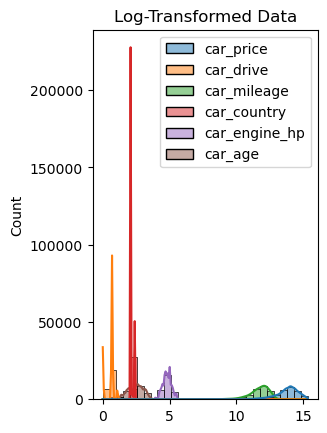

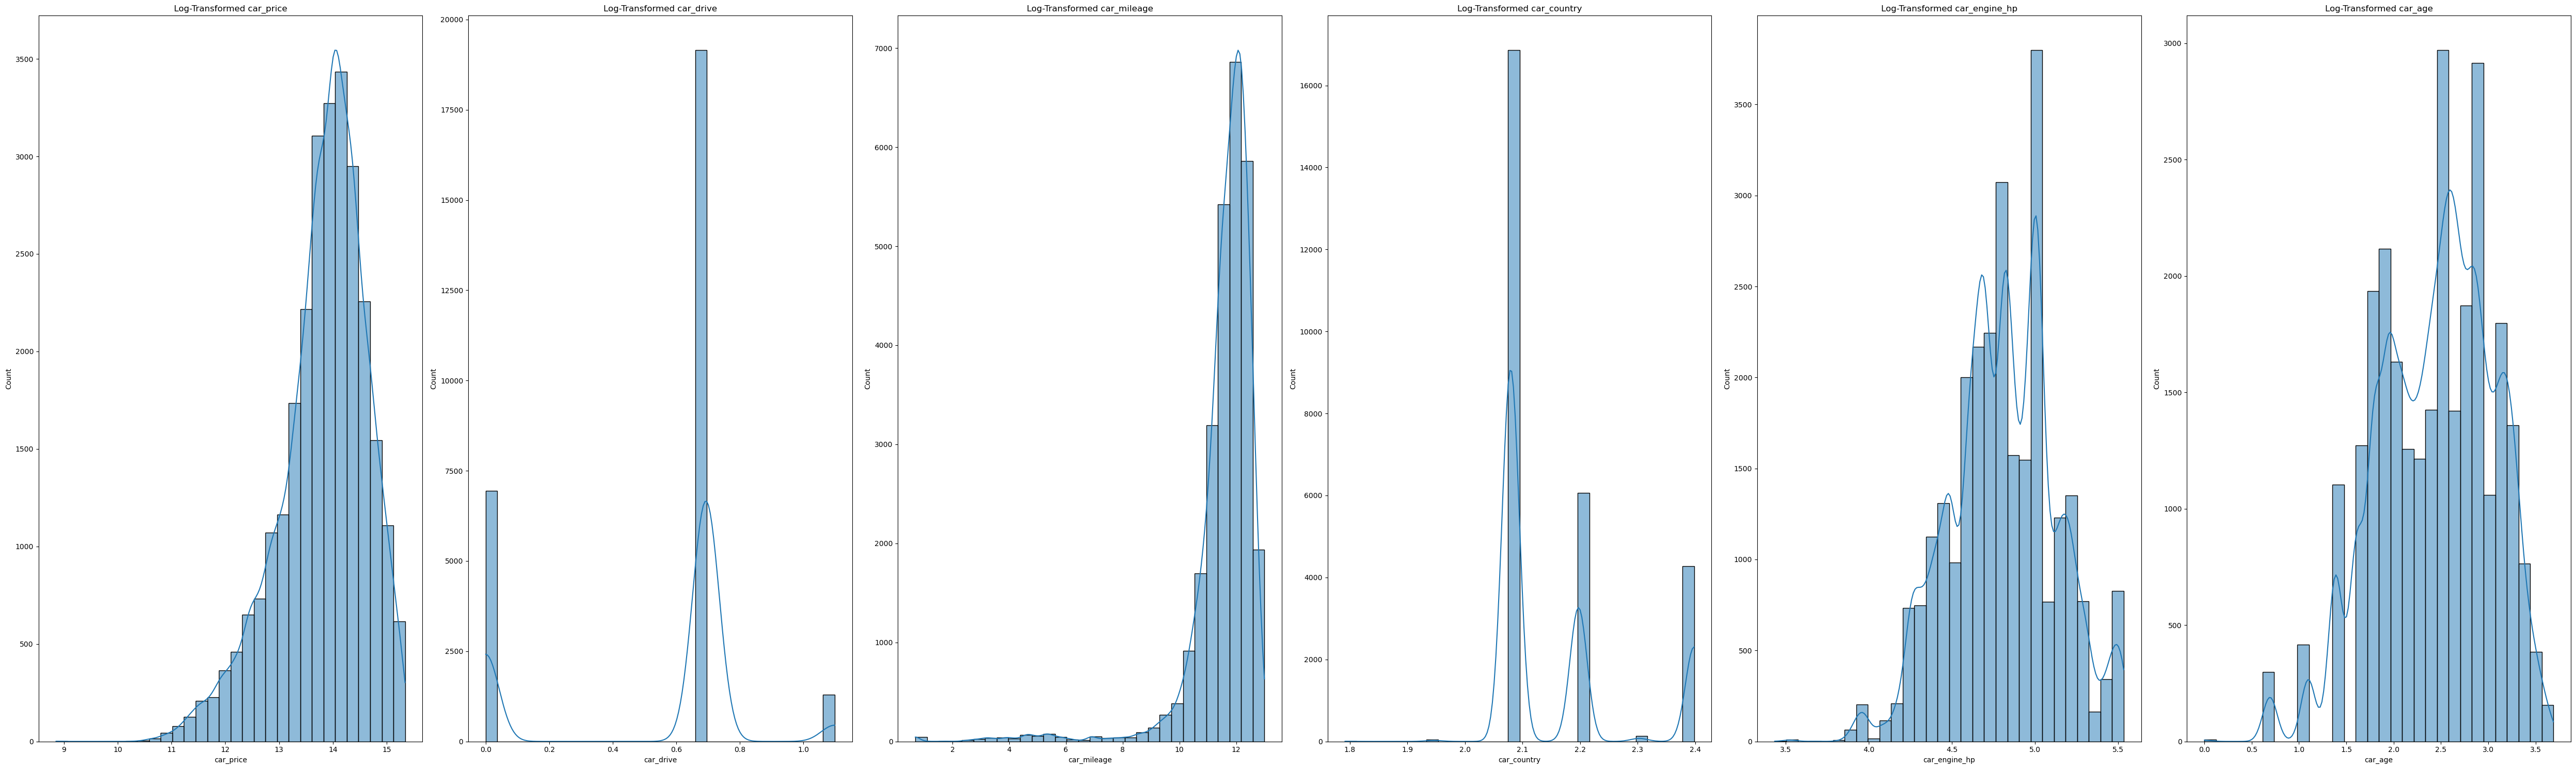

In [58]:

#To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()


In [59]:
df.shape

(27381, 6)

#Preparing Data for Modeling:

The model is used to make predictions based on new user input.

In [63]:

df = log_data


# Predict and evaluate the model


* Model Training
  Train-Test Split: Split the dataset into training and testing sets.

Model: Random Forest Regresso
r
* Model Evaluation  
Metric: Mean Squared Error (MSE
)
. Summary and Next Steps 
 
Summary:

Developed a Random Forest model to predict car age.

Evaluated model performance using Mean Squared Error.

Next Steps:

Improve the model by tuning hyperparameters.

Explore feature engineering to enhance model performance.

Validate the model on a separate vaidation set.



In [67]:

# Define features and target variable
x = df[['car_mileage', 'car_age', 'car_drive', 'car_country', 'car_engine_hp']] # Features
y = df['car_price']    # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(x_test)

# Model evalution
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Absolute Error: 0.26
Root Mean Squared Error: 0.34
R-squared: 0.82


In [71]:

# Take user input for new data 'car_mileage', 'car_age', 'car_drive', 'car_country', 'car_engine_hp' .
car_mileage   = float(input('Enter car_mileage -'))
car_age       = float(input('Enter car_age -'))
car_drive     = float(input('Enter car_drive -'))
car_country   = float(input('Enter car_country -'))
car_engine_hp = float(input('Enter car_engine_hp -'))

user_input = [[car_mileage, car_age, car_drive, car_country, car_engine_hp]]

# make a prediction using the trained model 
car_price = model.predict(user_input)
print(f'the predicted :{car_price}')


Enter car_mileage - 0.96
Enter car_age - 3
Enter car_drive - 0.48
Enter car_country - 1
Enter car_engine_hp - 0.99


the predicted :[12.01964231]


C:\Users\Pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Visualizing Results:

A regression plot is generated to visualize the predicted versus actual car prices.

In [ ]:

sns.regplot(x = y_pred, y = y_test)
plt.xlabel("Predicted car_price")
